<a href="https://colab.research.google.com/github/jyotidabass/Fuzzy-c-means-clustering-tongue/blob/main/FCM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install fuzzy-c-means

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Attempting uninstall: typer
    Found existing installation: typer 0.4.1
    Uninstalling typer-0.4.1:
      Successfully uninstalled typer-0.4.1


In [2]:
%matplotlib inline
import numpy as np
from fcmeans import FCM
from matplotlib import pyplot as plt
import cv2
from google.colab.patches import cv2_imshow

In [3]:
n_samples = 3000

X = np.concatenate((
    np.random.normal((-2, -2), size=(n_samples, 2)),
    np.random.normal((2, 2), size=(n_samples, 2))
))
X

array([[-2.00438523, -1.88410147],
       [-0.81627455, -0.39047273],
       [ 0.41567805, -1.85675339],
       ...,
       [ 2.1686647 ,  2.11076887],
       [ 3.55722359,  1.65373413],
       [ 1.38798968,  0.75788843]])

In [4]:
fcm = FCM(n_clusters=2)
fcm.fit(X)

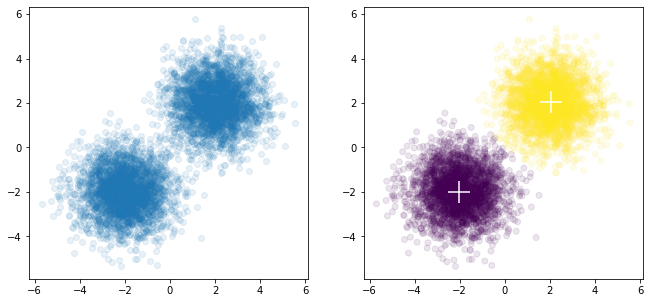

In [5]:
fcm_centers = fcm.centers
fcm_labels = fcm.predict(X)

# plot result
f, axes = plt.subplots(1, 2, figsize=(11,5))
axes[0].scatter(X[:,0], X[:,1], alpha=.1)
axes[1].scatter(X[:,0], X[:,1], c=fcm_labels, alpha=.1)
axes[1].scatter(fcm_centers[:,0], fcm_centers[:,1], marker="+", s=500, c='w')
plt.show()

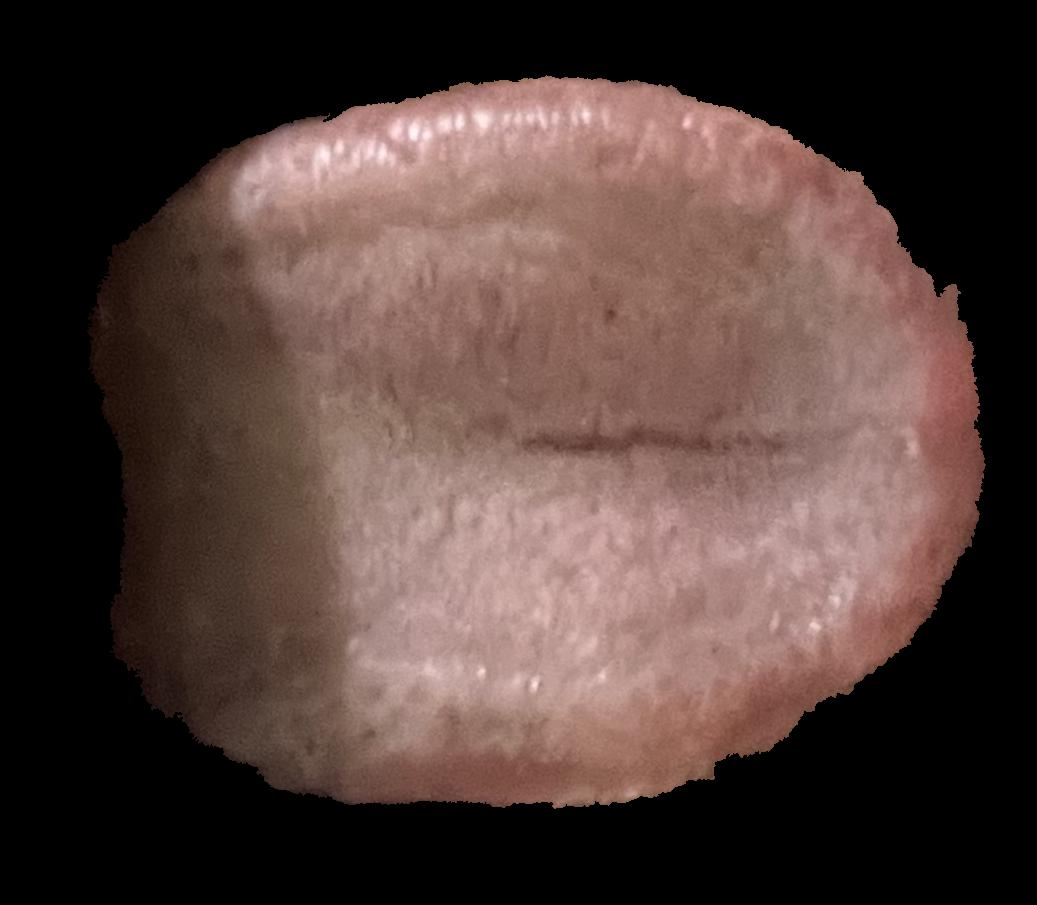

In [6]:
import PIL
from PIL import Image
im = cv2.imread('/content/cropped-1E6AE7E2-F4F6-4EFC-AFEC-75B6AF988C47 - Abhishek Karekar.jpg')
cv2_imshow(im)

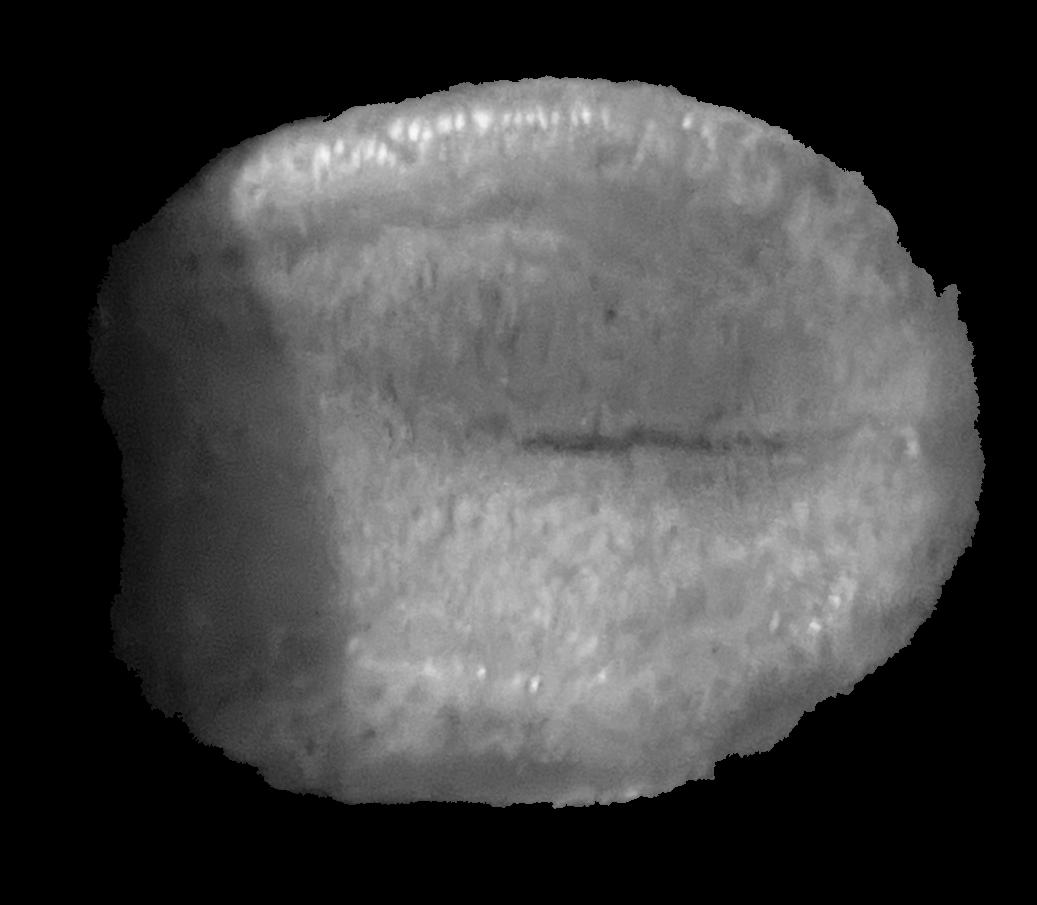

In [7]:
im_gray = cv2.imread('/content/cropped-1E6AE7E2-F4F6-4EFC-AFEC-75B6AF988C47 - Abhishek Karekar.jpg', cv2.IMREAD_GRAYSCALE)
imarray = np.array(im)
cv2_imshow(im_gray)

In [16]:
fcm = FCM(n_clusters=50)
fcm.fit(im_gray)


In [17]:
fcm_centers = fcm.centers
fcm_labels = fcm.predict(im_gray)

In [18]:
fcm_centers = np.uint8(fcm_centers) 
segmented_data = fcm_centers[fcm_labels] 

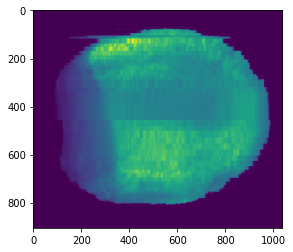

In [19]:
segmented_image = segmented_data.reshape((im_gray.shape)) 
plt.savefig('basic-clustering-output.jpg')
plt.imshow(segmented_image)